In [20]:
import pandas as pd

import sys
import os
sys.path.append(os.path.abspath("../"))

from scripts.time_series_preprocessing import (
    extract_currency_series,
    rename_columns_and_set_id,
    convert_column_to_datetime,
    convert_column_to_float,
    drop_over_limit_date,
    export_to_parquet
)

from scripts.time_series_visualization import (
    plot_raw_series,
    plot_series_acf,
    plot_series_pacf,
    checks_stationarity
)

In [21]:
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [22]:
df_milho = pd.read_csv("../data/raw/milho/INDICADOR DO MILHO ESALQ-BM&FBOVESPA.csv")

In [23]:
df_milho.head()

,Data,À vista R$,À vista US$
0,02/08/2004,"18,24","5,98"
1,03/08/2004,"18,04","5,91"
2,04/08/2004,"18,02","5,9"
3,05/08/2004,"18,06","5,89"
4,06/08/2004,"18,13","5,98"


In [24]:
df_milho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         5169 non-null   object
 1   À vista R$   5169 non-null   object
 2   À vista US$  5169 non-null   object
dtypes: object(3)
memory usage: 121.3+ KB


In [25]:
df_milho_br = extract_currency_series(df_milho)
df_milho_br.head()

,Data,À vista R$
0,02/08/2004,"18,24"
1,03/08/2004,"18,04"
2,04/08/2004,"18,02"
3,05/08/2004,"18,06"
4,06/08/2004,"18,13"


In [26]:
cols_dict_brl = {
    'Data': 'ds',
    'À vista R$': 'y'
}

df_milho_br = rename_columns_and_set_id(df_milho_br, cols_dict_brl, "MILHO")
df_milho_br = convert_column_to_datetime(df_milho_br, "ds")
df_milho_br = convert_column_to_float(df_milho_br, "y")

df_milho_br.head()

,ds,y,unique_id
0,2004-08-02,18.24,MILHO
1,2004-08-03,18.04,MILHO
2,2004-08-04,18.02,MILHO
3,2004-08-05,18.06,MILHO
4,2004-08-06,18.13,MILHO


In [27]:
df_milho_br.tail()

,ds,y,unique_id
5164,2025-04-30,80.13,MILHO
5165,2025-05-02,79.07,MILHO
5166,2025-05-05,79.05,MILHO
5167,2025-05-06,77.61,MILHO
5168,2025-05-07,76.38,MILHO


In [28]:
df_milho_br = drop_over_limit_date(df_milho_br, '01/05/2025', "ds")
df_milho_br.tail()

,ds,y,unique_id
5160,2025-04-24,81.60,MILHO
5161,2025-04-25,80.54,MILHO
5162,2025-04-28,80.49,MILHO
5163,2025-04-29,80.37,MILHO
5164,2025-04-30,80.13,MILHO


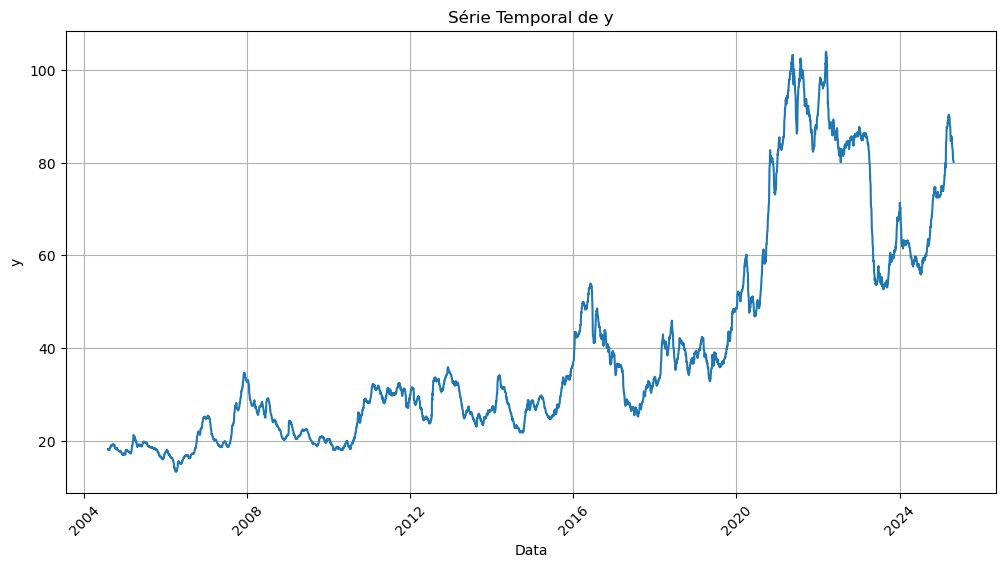

In [29]:
plot_raw_series(df_milho_br, "y")

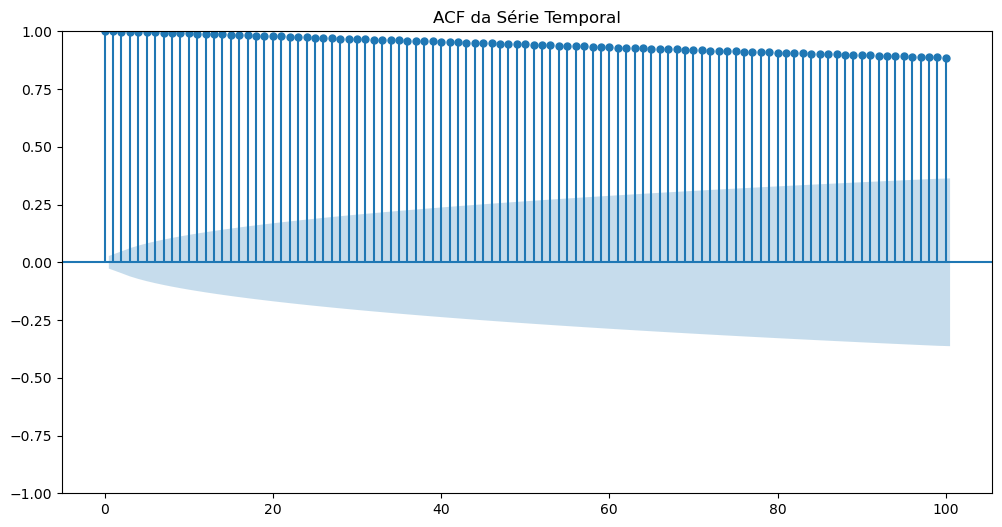

In [30]:
plot_series_acf(df_milho_br['y'])

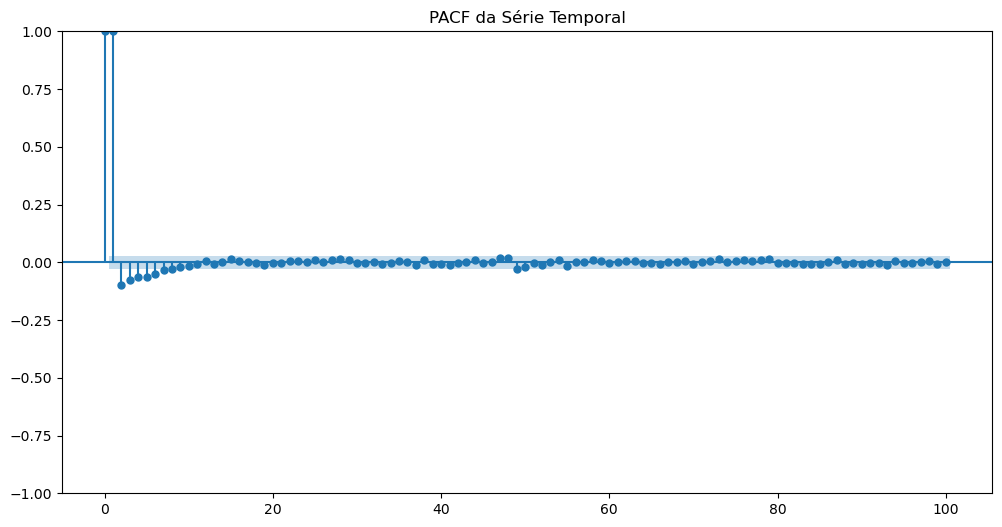

In [31]:
plot_series_pacf(df_milho_br['y'])

In [32]:
checks_stationarity(df_milho_br['y'])

ADF Statistic: -0.8946806309780453
p-value: 0.7897191143881248
Críticos: {'1%': np.float64(-3.4316246100189267), '5%': np.float64(-2.862103243011579), '10%': np.float64(-2.567069814385998)}
❌ Série não é estacionária.


In [33]:
export_to_parquet(df_milho_br, "../data/milho/milho_brl.parquet")

Arquivo salvo em: ../data/milho/milho_brl.parquet
